In [ ]:
#libraries prerequisite
# !pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy as sp
import scipy.stats as stats
import scipy.linalg as linalg
from sklearn.linear_model import LinearRegression
import sklearn as skl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.patches as mpatches

#Parametres

startdate = '2023-01-01'
#enddate = '2024-04-28'
enddate = pd.Timestamp.now().strftime('%Y-%m-%d')

#Importation manuelle de la data

meta = yf.Ticker("META")
tesla = yf.Ticker("TSLA")
aapl = yf.Ticker("AAPL")
bitcoin = yf.Ticker("BTC-USD")
gold = yf.Ticker("GC=F")
ether = yf.Ticker("ETH-USD")
solana = yf.Ticker("SOL-USD")
oil = yf.Ticker("CL=F") #WTI
nvda = yf.Ticker("NVDA")
dji = yf.Ticker("^DJI")
sp500 = yf.Ticker("^GSPC")
ba = yf.Ticker("BA") #Boeing
usd = yf.Ticker("EUR=X") #USDvsEUR

#Cryptos

btc_historical = bitcoin.history(start=startdate, end=enddate, interval="1d")
btc_historical = btc_historical.reset_index() #Passe la date en colonne "classique"
btc_historical['Temps (1d)'] = btc_historical.index + 1 #Permet d'avoir une colonne qui compte nombre jour (autre que l'index car chiant à utiliser)

eth_historical = ether.history(start=startdate, end=enddate, interval="1d")
eth_historical = eth_historical.reset_index()
eth_historical['Temps (1d)'] = eth_historical.index + 1

sol_historical = solana.history(start=startdate,end=enddate, interval="1d")
sol_historical = sol_historical.reset_index()
sol_historical['Temps (1d)'] = sol_historical.index + 1

#Matières premières

gold_historical = gold.history(period="max", interval="1wk")
gold_historical = gold_historical.reset_index()

oil_historical = oil.history(start=startdate, end=enddate, interval = "1h")
oil_historical = oil_historical.reset_index()

#Forex

usd_historical = usd.history(start=startdate, end=enddate, interval = "1d")
usd_historical = usd_historical.reset_index()

#Entreprises

meta_historical = meta.history(start=startdate, end=enddate, interval = "1d")
meta_historical = meta_historical.reset_index()

aapl_historical = aapl.history(start=startdate, end=enddate, interval = "1h")
aapl_historical = aapl_historical.reset_index()

tesla_historical = tesla.history(start=startdate, end=enddate, interval = "1d")
tesla_historical = tesla_historical.reset_index()

nvda_historical = nvda.history(start=startdate, end=enddate, interval = "1d")
nvda_historical = nvda_historical.reset_index()

ba_historical = ba.history(start=startdate, end=enddate, interval = "1d")
ba_historical = ba_historical.reset_index()

#Indices boursiers

dji_historical = dji.history(start=startdate, end=enddate, interval = "1d")
dji_historical = dji_historical.reset_index()
sp500_historical = sp500.history(start=startdate, end=enddate, interval = "1d")
sp500_historical = sp500_historical.reset_index()
sp500_historical['Temps (1d)'] = sp500_historical.index + 1

#Les 500 tickers du S&P

sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')[0]
sp500_tickers = sp500_tickers.Symbol.tolist()


#Modifications de format Date

sp500_historical['Date'] = sp500_historical['Date'].dt.strftime('%Y-%m-%d')
usd_historical['Date'] = usd_historical['Date'].dt.strftime('%Y-%m-%d')



tesla.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

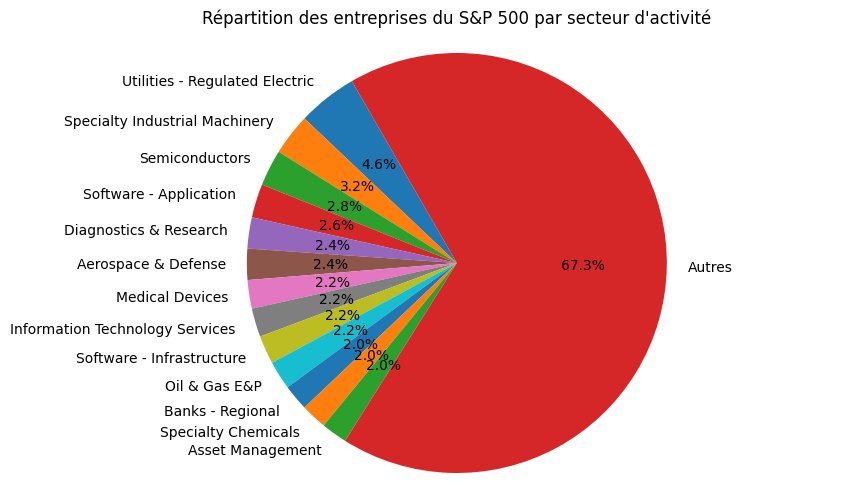

In [ ]:
sp500_info = []
for ticker in sp500_tickers:
    try:
        company_info = yf.Ticker(ticker).info
        sp500_info.append(company_info)
    except:
        pass

sp500_df = pd.DataFrame(sp500_info)

secteur_counts = sp500_df['industry'].value_counts()

other_secteurs = secteur_counts[secteur_counts < 0.018 * len(sp500_df)].index
secteur_counts['Autres'] = secteur_counts[other_secteurs].sum()
secteur_counts.drop(other_secteurs, inplace=True)

plt.figure(figsize=(10, 6))
secteur_counts.plot(kind='pie', autopct='%1.1f%%', startangle=120)
plt.title("Répartition des entreprises du S&P 500 par secteur d'activité")
plt.ylabel(None)
plt.axis('equal')
plt.show()

In [ ]:
aapl_historical #Dataframe type


In [ ]:
#Diagramme en 3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = range(len(btc_historical.index))
z = btc_historical['Close']
y = btc_historical['Volume']
ax.plot(x, y, z, label='Bitcoin')

ax.set_xlabel('Temps (en jours)')
ax.set_ylabel('Volume')
ax.set_zlabel('Prix')
ax.set_title('Prix vs Volume')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend()
plt.show()

In [ ]:
#Évolution du prix

gold_historical['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
#Min et Max de l'action par rapport aux prix de fermeture

eth_historical['High'].plot(kind='line', figsize=(8, 4), label = 'High', color = 'g')
eth_historical['Low'].plot(kind='line', figsize=(8, 4), label = 'Low', color = 'r')
eth_historical['Close'].plot(kind='line', figsize=(8, 4), label = 'Close', color = 'k')

plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

In [ ]:
#Comparaison des prix de 3 actifs
plt.figure(figsize=(8, 10))
btc_historical['Close'].plot(kind='line', label = 'Bitcoin')
eth_historical['Close'].plot(kind='line', label = 'Ethereum')
sol_historical['Close'].plot(kind='line', label = 'Solana')

plt.yscale('log')
plt.xlabel('Date')
plt.ylabel('Prix')
plt.legend()
plt.show()

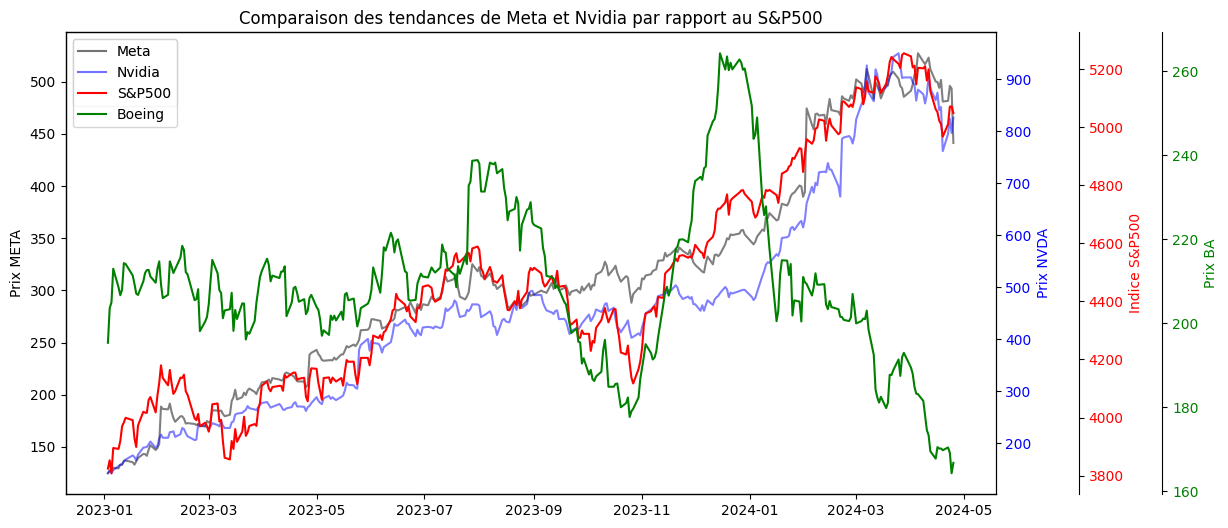

In [ ]:
#Comparaison des tendances de 3 actions et de l'indice

fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(meta_historical['Date'], meta_historical['Close'], label='Meta', color='black', alpha=0.5)
ax1.set_ylabel('Prix META', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(nvda_historical['Date'], nvda_historical['Close'], label='Nvidia', color='blue', alpha=0.5)
ax2.set_ylabel('Prix NVDA', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(sp500_historical['Date'], sp500_historical['Close'], label='S&P500', color='red')
ax3.set_ylabel('Indice S&P500', color='red')
ax3.tick_params(axis='y', labelcolor='red')

ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
ax4.plot(ba_historical['Date'], ba_historical['Close'], label='Boeing', color='green')
ax4.set_ylabel('Prix BA', color='green')
ax4.tick_params(axis='y', labelcolor='green')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
ax3.legend(lines + lines2 + lines3, labels + labels2 + labels3, loc='upper left')
lines4, labels4 = ax4.get_legend_handles_labels()
ax4.legend(lines + lines2 + lines3 + lines4, labels + labels2 + labels3 + labels4, loc='upper left')


plt.title('Comparaison des tendances de Meta, Boeing et Nvidia par rapport au S&P500')
plt.xlabel('Date')
plt.show()

In [ ]:
#Volume moyen par heure APPLE

aapl_hbh = aapl_historical

aapl_hbh["Heure"] = aapl_hbh["Datetime"].dt.hour
aapl_hbh = aapl_hbh.groupby('Heure')['Volume'].mean().reset_index()
aapl_hbh = aapl_hbh.rename(columns={'Volume': 'Volume moyen'})

plt.bar(aapl_hbh['Heure'], aapl_hbh['Volume moyen'])
plt.xlabel('Heure')
plt.ylabel('Volume moyen')
plt.title('Volume moyen par heure')
plt.show()

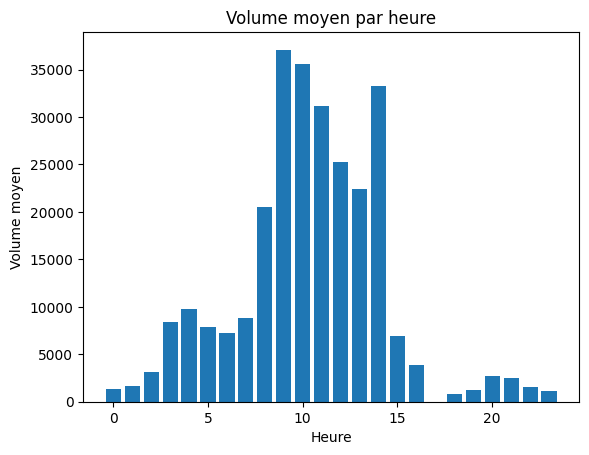

In [ ]:
#Volume moyen par heure WTI-OIL

oil_hbh = oil_historical


oil_hbh["Heure"] = oil_hbh["Datetime"].dt.hour
oil_hbh = oil_hbh.groupby('Heure')['Volume'].mean().reset_index()
oil_hbh = oil_hbh.rename(columns={'Volume': 'Volume moyen'})

plt.bar(oil_hbh['Heure'], oil_hbh['Volume moyen'])
plt.xlabel('Heure')
plt.ylabel('Volume moyen')
plt.title('Volume moyen par heure')
plt.show()

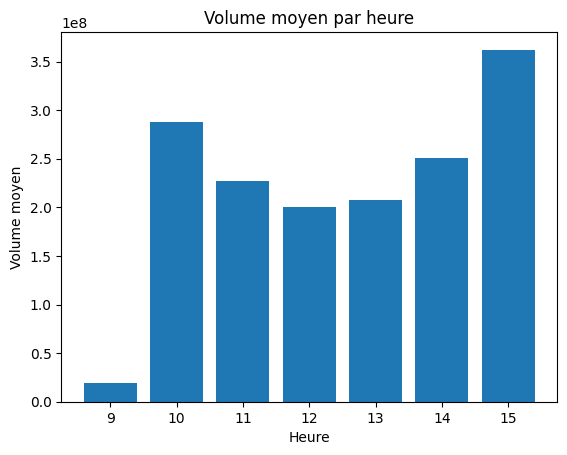

In [ ]:
#Volume moyen par heure SP500

sp500_hbh = sp500.history(start=startdate, end=enddate, interval="1h")
sp500_hbh = sp500_hbh.reset_index()

sp500_hbh["Heure"] = sp500_hbh["Datetime"].dt.hour
sp500_hbh = sp500_hbh.groupby('Heure')['Volume'].mean().reset_index()
sp500_hbh = sp500_hbh.rename(columns={'Volume': 'Volume moyen'})

plt.bar(sp500_hbh['Heure'], sp500_hbh['Volume moyen'])
plt.xlabel('Heure')
plt.ylabel('Volume moyen')
plt.title('Volume moyen par heure')
plt.show()

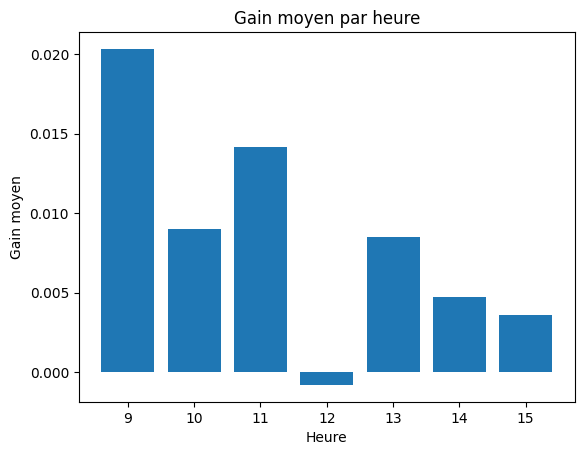

In [ ]:
#Gain moyen par heure SP500

sp500_gph = sp500.history(start=startdate, end=enddate, interval="1h")
sp500_gph = sp500_gph.reset_index()

sp500_gph["Heure"] = sp500_gph["Datetime"].dt.hour


sp500_gph['Gain'] = ((sp500_gph['Close'] - sp500_gph['Open']) / sp500_gph['Open']) * 100
sp500_gph = sp500_gph.groupby('Heure').agg({'Volume': 'mean','Gain': 'mean'}).reset_index()
sp500_gph = sp500_gph.rename(columns={'Volume': 'Volume moyen', 'Gain': 'Gain moyen'})

plt.bar(sp500_gph['Heure'], sp500_gph['Gain moyen'])
plt.xlabel('Heure')
plt.ylabel('Gain moyen')
plt.title('Gain moyen par heure')
plt.show()


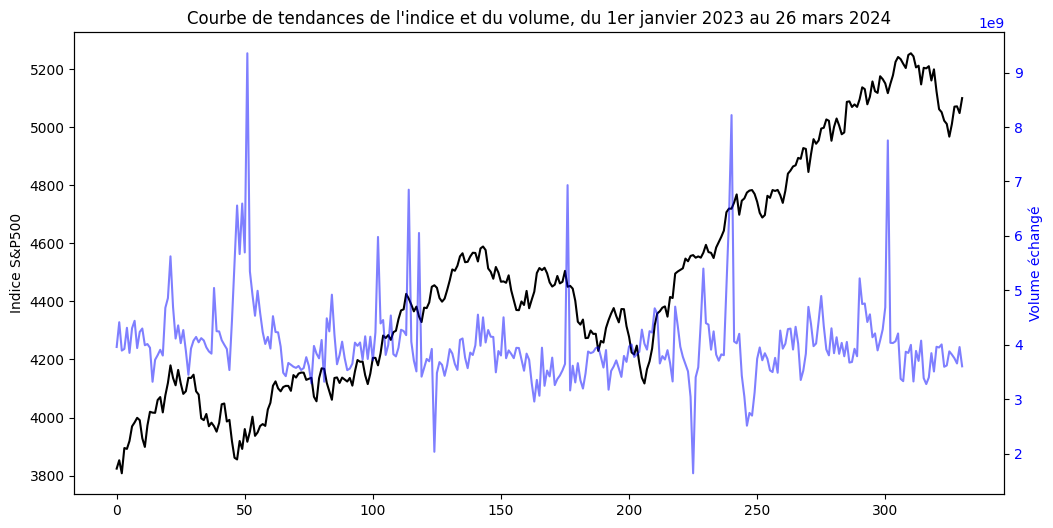

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(sp500_historical.index, sp500_historical['Close'], label='Indice', color='black', alpha=1)
ax1.set_ylabel('Indice S&P500', color='black')
ax1.tick_params(axis='y', labelcolor='black')

ax2 = ax1.twinx()
ax2.plot(sp500_historical.index, sp500_historical['Volume'], label='Volume', color='blue', alpha=0.5)
ax2.set_ylabel('Volume échangé', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.title("Courbe de tendances de l'indice et du volume, du 1er janvier 2023 au 26 mars 2024")
plt.xlabel('Temps (1d)')
plt.show()

In [ ]:
#Gain moyen par heure

sp500_hbh = bitcoin.history(start=startdate, end=enddate, interval="1h")
sp500_hbh = sp500_hbh.reset_index()

sp500_hbh["Heure"] = sp500_hbh["Datetime"].dt.hour
sp500_hbh = sp500_hbh.groupby('Heure')['Volume'].mean().reset_index()
sp500_hbh = sp500_hbh.rename(columns={'Volume': 'Volume moyen'})

plt.bar(sp500_hbh['Heure'], sp500_hbh['Volume moyen'])
plt.xlabel('Heure')
plt.ylabel('Volume moyen')
plt.title('Volume moyen par heure')
plt.show()

***À partir de là le but c'est de reproduire le TD3 (ce qu'il y a avant c'est du freestyle)***

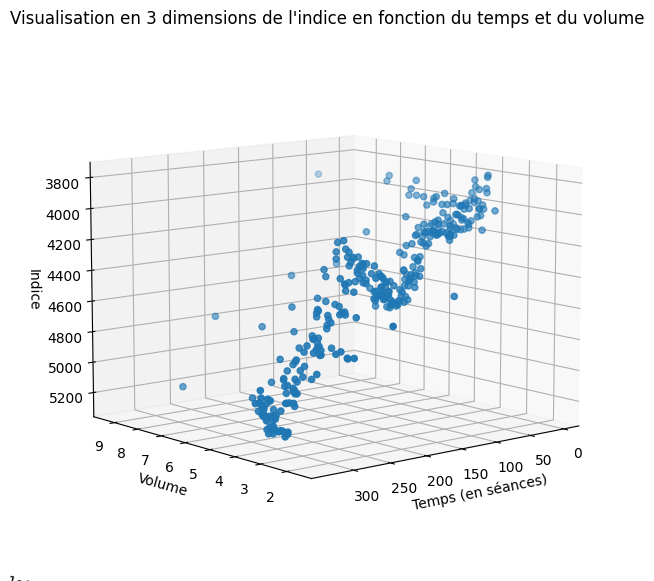

In [ ]:
#Visualisation 3D
sp500_np = sp500_historical.to_numpy()
fig_3d = plt.figure(figsize=(20, 7))
ax_3d = fig_3d.add_subplot(projection="3d", elev=-170, azim=130)
ax_3d.scatter(sp500_np[:,8], sp500_np[:, 5], sp500_np[:, 4])
ax_3d.set_xlabel("Temps (en séances)")
ax_3d.set_ylabel("Volume")
ax_3d.set_zlabel("Indice")
plt.title("Visualisation en 3 dimensions de l'indice en fonction du temps et du volume")
plt.show()

In [ ]:
X = sp500_np[:, [8, 5]]
y = sp500_np[:, 4]

X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])

X_with_intercept = X_with_intercept.astype(float)
y = y.astype(float)

coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

Beta0, Beta1, Beta2 = coefficients[0], coefficients[1], coefficients[2]
print("Beta0:", Beta0)
print("Beta1:", Beta1)
print("Beta2:", Beta2)

Beta0: 3843.7350118045797
Beta1: 3.7070022982336415
Beta2: 1.4128692784335821e-09


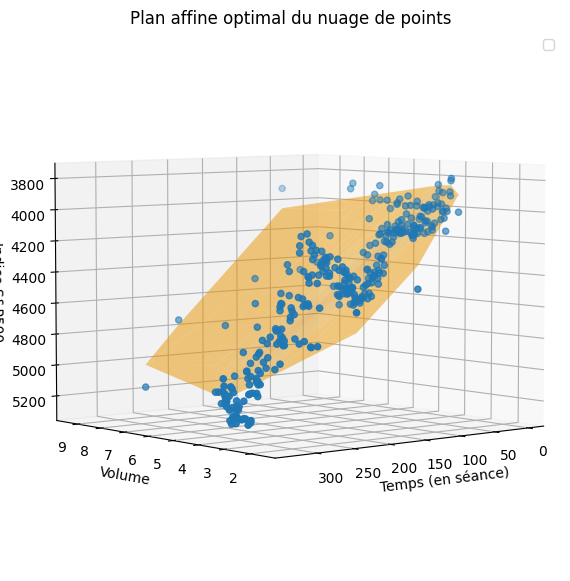

In [ ]:
fig_3d = plt.figure(figsize=(12, 7))
ax_3d = fig_3d.add_subplot(projection="3d", elev=-175, azim=130)
ax_3d.scatter(sp500_np[:, 8], sp500_np[:, 5], sp500_np[:, 4], label='Données réelles')

X0 = sp500_historical['Temps (1d)']
X1 = sp500_historical['Volume']
y_pred = Beta0 + Beta1*X0 + Beta2*X1

ax_3d.plot_trisurf(X0, X1, y_pred, alpha=0.5, color='orange', label='Plan affine de régression')

ax_3d.set_xlabel("Temps (en séance)")
ax_3d.set_ylabel("Volume")
ax_3d.set_zlabel("Indice S&P500")
ax_3d.legend("")
plt.title("Plan affine optimal du nuage de points")

plt.show()

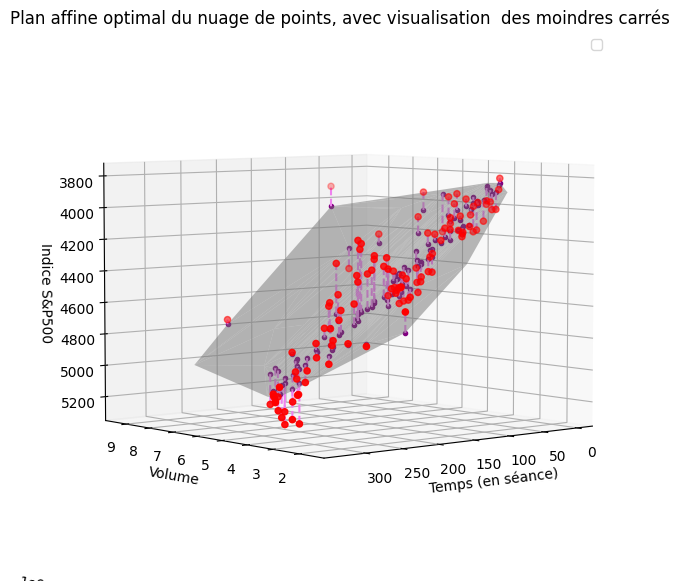

In [ ]:
fig_3d = plt.figure(figsize=(12, 7))
ax_3d = fig_3d.add_subplot(projection="3d", elev=-175, azim=130)
ax_3d.scatter(sp500_np[::3, 8], sp500_np[::3, 5], sp500_np[::3, 4], label='Données réelles', color='red')

X0 = sp500_historical['Temps (1d)']
X1 = sp500_historical['Volume']
y_pred = Beta0 + Beta1*X0 + Beta2*X1

ax_3d.plot_trisurf(X0, X1, y_pred, alpha=0.5, color='grey', label='Plan affine de régression')

ax_3d.set_xlabel("Temps (en séance)")
ax_3d.set_ylabel("Volume")
ax_3d.set_zlabel("Indice S&P500")
ax_3d.legend("")
plt.title("Plan affine optimal du nuage de points, avec visualisation  des moindres carrés")
n = sp500_np.shape[0]
for i in range(0, n, 3):
    ax_3d.plot(sp500_np[i, 8], sp500_np[i, 5], (Beta0 + Beta1*sp500_np[i, 8] + Beta2*sp500_np[i, 5]), marker=".", color="purple")
    ax_3d.plot([sp500_np[i, 8], sp500_np[i, 8]], [sp500_np[i, 5], sp500_np[i, 5]], [(Beta0 + Beta1*sp500_np[i, 8] + Beta2*sp500_np[i, 5]), sp500_np[i, 4]], color="violet", linestyle="--")

plt.show()

In [ ]:
X0_grid, X1_grid = np.meshgrid(X0, X1)

fig_3d = plt.figure(figsize=(10, 10))
ax_3d = fig_3d.add_subplot(projection="3d", elev=-160, azim=130)
ax_3d.scatter(sp500_np[:, 8], sp500_np[:, 5], sp500_np[:, 4], label='Données réelles')

y_pred = Beta0 + Beta1*X0_grid + Beta2*X1_grid
ax_3d.plot_wireframe(X0_grid, X1_grid, y_pred, rstride=150, cstride=30, color="red")

ax_3d.set_xlabel("Temps (1d)")
ax_3d.set_ylabel("Volume")
ax_3d.set_zlabel("Indice S&P500")
ax_3d.legend("")

plt.show()

In [ ]:
reg_mod = LinearRegression().fit(X, y)
print("Le coefficient de détermination est : ", reg_mod.score(X, y))

Le coefficient de détermination est :  0.8526678739701683


In [ ]:
merged_df = pd.merge(sp500_historical[['Date', 'Close', 'Volume']],
                     usd_historical[['Date', 'Close']],
                     on='Date',
                     how='inner')

merged_df.columns = ['Date', 'Indice', 'Volume', 'Cours Dollars']
merged_df['Séance'] = merged_df.index + 1
merged_np = merged_df.to_numpy()
print(merged_df)

           Date       Indice      Volume  Cours Dollars  Séance
0    2023-01-03  3824.139893  3959140000        0.93653       1
1    2023-01-04  3852.969971  4414080000        0.94815       2
2    2023-01-05  3808.100098  3893450000        0.94283       3
3    2023-01-06  3895.080078  3923560000        0.95037       4
4    2023-01-09  3892.090088  4311770000        0.93841       5
..          ...          ...         ...            ...     ...
327  2024-04-23  5070.549805  3751400000        0.93861     328
328  2024-04-24  5071.629883  3656740000        0.93420     329
329  2024-04-25  5048.419922  3958050000        0.93459     330
330  2024-04-26  5099.959961  3604140000        0.93200     331
331  2024-04-29  5116.169922  3447450000        0.93398     332

[332 rows x 5 columns]


In [ ]:
X = merged_np[:, [2, 3, 4]]
y = merged_np[:, 1]


X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])

X_with_intercept = X_with_intercept.astype(float)
y = y.astype(float)

coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y
Beta0, Beta1, Beta2, Beta3 = coefficients

X0 = merged_df['Séance']
X1 = merged_df['Volume']
X2 = merged_df['Cours Dollars']
y_pred = Beta0 + Beta1*X0 + Beta2*X1 + Beta3*X2

reg_mod = LinearRegression().fit(X, y)
r_squared = reg_mod.score(X, y)


print("Beta0:", Beta0)
print("Beta1:", Beta1)
print("Beta2:", Beta2)
print("Beta3:", Beta3)
print("Coefficient de détermination :", r_squared)

Beta0: 9199.456898586172
Beta1: 9.880438968265023e-09
Beta2: -5829.1701644192535
Beta3: 3.7005990775037887
Coefficient de détermination : 0.8909181412148661


In [ ]:
future_dates = pd.date_range(start='2024-04-29', periods=1, freq='D')
future_volume = [3447450000,4451400000,4256740000,3958050000,3804140000] #REMPLIR AVEC DES DONNEES COHERENTES
future_dollar_price = [0.9340,0.93861,0.93420,0.93459,0.93470]
future_seance = [332,333,334,335,336]

future_data = pd.DataFrame({
    'Volume': future_volume,
    'Cours Dollars': future_dollar_price,
    'Séance': future_seance
})

print(future_data)

       Volume  Cours Dollars  Séance
0  3447450000        0.93400     332
1  4451400000        0.93861     333
2  4256740000        0.93420     334
3  3958050000        0.93459     335
4  3804140000        0.93470     336


In [ ]:
X = merged_df[['Volume', 'Cours Dollars', 'Séance']]
y = merged_df['Indice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
print("Erreur quadratique moyenne :", mse ** 0.5)

future_predictions = model.predict(future_data)

print(future_predictions)

Erreur quadratique moyenne : 126.65625557372071
[5013.23237858 5003.36206097 5031.58938672 5028.37369928 5029.08057485]


La moyenne du prix est : 4464.653596169279
La médiane du prix est : 4405.7099609375
Minimum :  3808.10009765625  Maximum :  5254.35009765625
La variance des prix est de : 147313.05644058232  et l'écart-type :  383.8138304446341


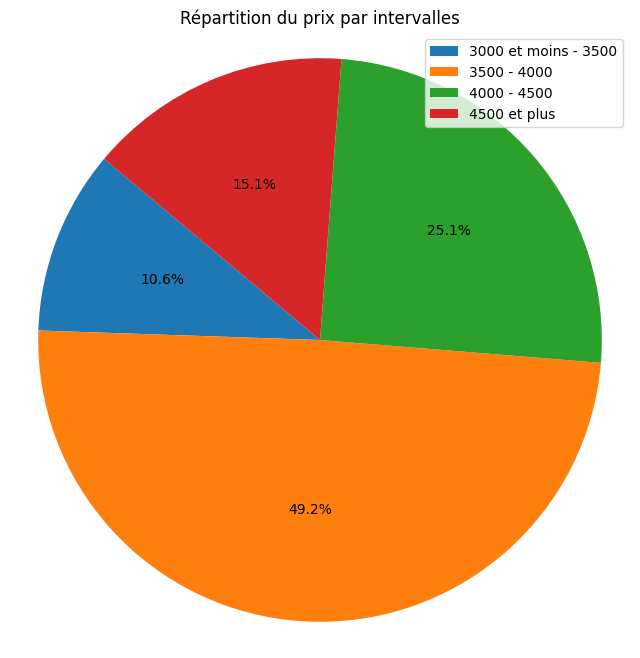

In [ ]:
moyenne_prix = sp500_historical['Close'].mean()

print("La moyenne du prix est :", moyenne_prix)

mediane_prix= sp500_historical['Close'].median();

print("La médiane du prix est :", mediane_prix)

minprix=sp500_historical['Close'].min()
maxprix=sp500_historical['Close'].max()

print("Minimum : ",minprix," Maximum : ",maxprix);


ecarttype_prix = sp500_historical['Close'].std()

variance_prix = sp500_historical['Close'].var()

print("La variance des prix est de :", variance_prix, " et l'écart-type : ", ecarttype_prix)


intervalles = [(3500, 4000), (4000, 4500), (4500, 5000),(5000,6000)]

occurrences = []
for intervalle in intervalles:
    occurrences.append(((sp500_historical['Close'] >= intervalle[0]) & (sp500_historical['Close'] < intervalle[1])).sum())

plt.figure(figsize=(8, 8))
plt.pie(occurrences, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Répartition du prix par intervalles')
plt.legend(labels, loc='upper right')

plt.show()

In [ ]:
moyenne_volume = sp500_historical['Volume'].mean()

print("La moyenne du prix est :", moyenne_volume)

mediane_volume= sp500_historical['Volume'].median();

print("La médiane du volume est :", mediane_volume)

minvolume=sp500_historical['Volume'].min()
maxvolume=sp500_historical['Volume'].max()

print("Minimum : ",minvolume," Maximum : ",maxvolume);


ecarttype_Volume = sp500_historical['Volume'].std()

variance_Volume = sp500_historical['Volume'].var() #Chelou ta valeur

print("La variance du volume est de :", variance_Volume, " et l'écart-type : ", ecarttype_Volume)


La moyenne du prix est : 4011340664.652568
La médiane du volume est : 3902030000.0
Minimum :  1639500000  Maximum :  9354280000
La variance du volume est de : 5.539258462795569e+17  et l'écart-type :  744261947.3542612


In [ ]:
vix_data_2008 = yf.download("^VIX", start="2008-01-01", end="2008-12-31").rename(columns={'Close': 'VIX'}).reset_index()
vix_data_2015 = yf.download("^VIX", start="2015-01-01", end="2015-12-31").rename(columns={'Close': 'VIX'}).reset_index()
vix_data_2020 = yf.download("^VIX", start="2020-01-01", end="2020-12-31").rename(columns={'Close': 'VIX'}).reset_index()
vix_data_2023 = yf.download("^VIX", start="2023-01-01", end="2023-12-31").rename(columns={'Close': 'VIX'}).reset_index()

sp_2008 = yf.download("^GSPC", start="2008-01-01", end="2008-12-31")
sp_2008['Return'] = np.log(sp_2008['Close'] / sp_2008['Close'].shift(1))
sp_2008 = sp_2008.reset_index()
sp_2015 = yf.download("^GSPC", start="2015-01-01", end="2015-12-31")
sp_2015['Return'] = np.log(sp_2015['Close'] / sp_2015['Close'].shift(1))
sp_2015 = sp_2015.reset_index()
sp_2020 = yf.download("^GSPC", start="2020-01-01", end="2020-12-31")
sp_2020['Return'] = np.log(sp_2020['Close'] / sp_2020['Close'].shift(1))
sp_2020 = sp_2020.reset_index()
sp_2023 = yf.download("^GSPC", start="2023-01-01", end="2023-12-31")
sp_2023['Return'] = np.log(sp_2023['Close'] / sp_2023['Close'].shift(1))
sp_2023 = sp_2023.reset_index()

display(vix_data_2008)
display(sp_2008)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Date,Open,High,Low,VIX,Adj Close,Volume
0,2008-01-02,22.580000,24.049999,22.400000,23.170000,23.170000,0
1,2008-01-03,23.110001,23.270000,22.110001,22.490000,22.490000,0
2,2008-01-04,23.500000,24.299999,23.250000,23.940001,23.940001,0
3,2008-01-07,24.620001,24.879999,23.299999,23.790001,23.790001,0
4,2008-01-08,23.270000,25.600000,22.629999,25.430000,25.430000,0
...,...,...,...,...,...,...,...
247,2008-12-23,43.189999,45.389999,41.680000,45.020000,45.020000,0
248,2008-12-24,45.020000,45.020000,44.150002,44.209999,44.209999,0
249,2008-12-26,44.270000,44.360001,42.919998,43.380001,43.380001,0
250,2008-12-29,43.349998,46.240002,42.160000,43.900002,43.900002,0


,Date,Open,High,Low,Close,Adj Close,Volume,Return
0,2008-01-02,1467.969971,1471.770020,1442.069946,1447.160034,1447.160034,3452650000,NaN
1,2008-01-03,1447.550049,1456.800049,1443.729980,1447.160034,1447.160034,3429500000,0.000000
2,2008-01-04,1444.010010,1444.010010,1411.189941,1411.630005,1411.630005,4166000000,-0.024858
3,2008-01-07,1414.069946,1423.869995,1403.449951,1416.180054,1416.180054,4221260000,0.003218
4,2008-01-08,1415.709961,1430.280029,1388.300049,1390.189941,1390.189941,4705390000,-0.018523
...,...,...,...,...,...,...,...,...
247,2008-12-23,874.309998,880.440002,860.099976,863.159973,863.159973,4051970000,-0.009765
248,2008-12-24,863.869995,869.789978,861.440002,868.150024,868.150024,1546550000,0.005764
249,2008-12-26,869.510010,873.739990,866.520020,872.799988,872.799988,1880050000,0.005342
250,2008-12-29,872.369995,873.700012,857.070007,869.419983,869.419983,3323430000,-0.003880


In [ ]:
data_2008 = pd.merge(sp_2008[['Date', 'Return']], vix_data_2008[['Date', 'VIX']], on='Date').dropna()
data_2015 = pd.merge(sp_2015[['Date', 'Return']], vix_data_2015[['Date', 'VIX']], on='Date').dropna()
data_2020 = pd.merge(sp_2020[['Date', 'Return']], vix_data_2020[['Date', 'VIX']], on='Date').dropna()
data_2023 = pd.merge(sp_2023[['Date', 'Return']], vix_data_2023[['Date', 'VIX']], on='Date').dropna()
display(data_2020)

,Date,Return,VIX
1,2020-01-03,-0.007085,14.020000
2,2020-01-06,0.003527,13.850000
3,2020-01-07,-0.002807,13.790000
4,2020-01-08,0.004890,13.450000
5,2020-01-09,0.006633,12.540000
...,...,...,...
247,2020-12-23,0.000746,23.309999
248,2020-12-24,0.003530,21.530001
249,2020-12-28,0.008685,21.700001
250,2020-12-29,-0.002230,23.080000


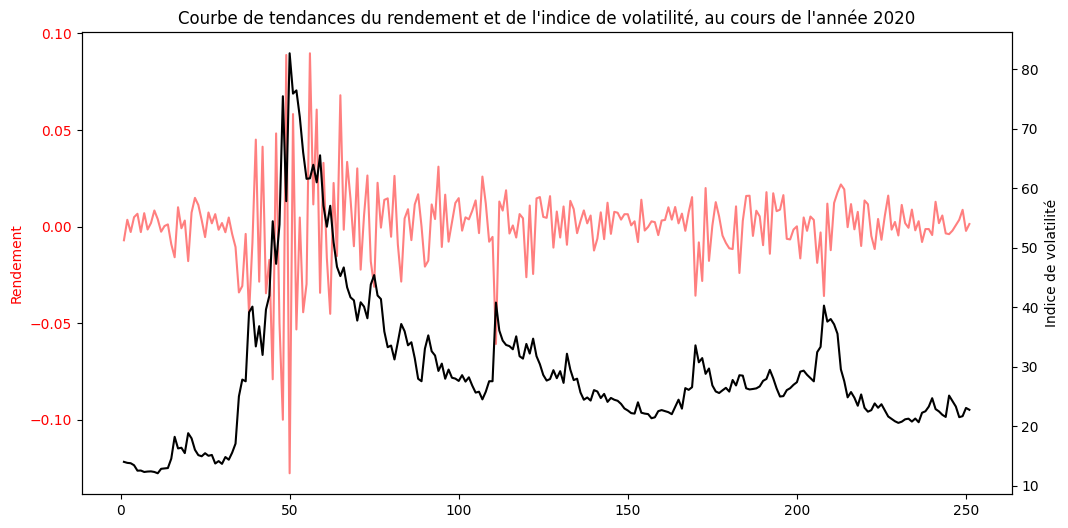

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data_2020.index, data_2020['Return'], label='Rendement', color='red', alpha=0.5)
ax1.set_ylabel('Rendement', color='red')
ax1.tick_params(axis='y', labelcolor='red')

ax2 = ax1.twinx()
ax2.plot(data_2020.index, data_2020['VIX'], label='VIX', color='black', alpha=1)
ax2.set_ylabel('Indice de volatilité', color='black')
ax2.tick_params(axis='y', labelcolor='black')


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()

plt.title("Courbe de tendances du rendement et de l'indice de volatilité, au cours de l'année 2020")
plt.xlabel('Temps (1 séance)')
plt.show()

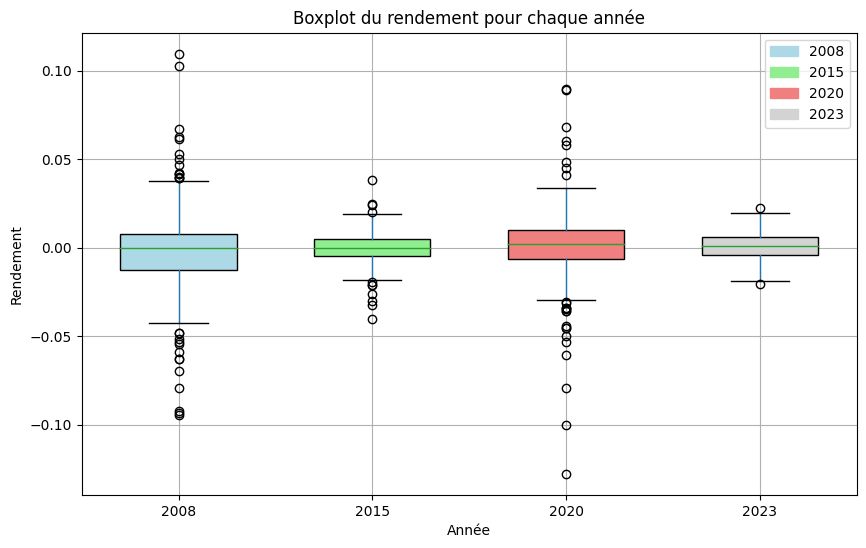

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

data_2008.boxplot(column='Return', ax=ax, positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))
data_2015.boxplot(column='Return', ax=ax, positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
data_2020.boxplot(column='Return', ax=ax, positions=[3], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
data_2023.boxplot(column='Return', ax=ax, positions=[4], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightgrey'))

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['2008', '2015', '2020', '2023'])

ax.set_title('Boxplot du rendement pour chaque année')
ax.set_xlabel('Année')
ax.set_ylabel('Rendement')

patch_2008 = mpatches.Patch(color='lightblue', label='2008')
patch_2015 = mpatches.Patch(color='lightgreen', label='2015')
patch_2020 = mpatches.Patch(color='lightcoral', label='2020')
patch_2023 = mpatches.Patch(color='lightgrey', label='2023')

plt.legend(handles=[patch_2008, patch_2015, patch_2020, patch_2023], loc='upper right')

plt.show()

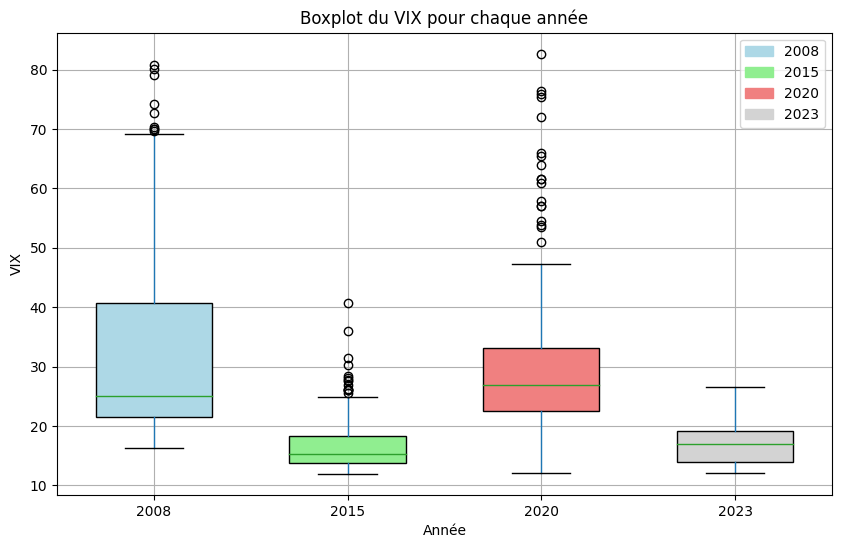

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

data_2008.boxplot(column='VIX', ax=ax, positions=[1], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))
data_2015.boxplot(column='VIX', ax=ax, positions=[2], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightgreen'))
data_2020.boxplot(column='VIX', ax=ax, positions=[3], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightcoral'))
data_2023.boxplot(column='VIX', ax=ax, positions=[4], widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightgrey'))

ax.set_xticks([1, 2, 3, 4])
ax.set_xticklabels(['2008', '2015', '2020', '2023'])

ax.set_title('Boxplot du VIX pour chaque année')
ax.set_xlabel('Année')
ax.set_ylabel('VIX')

patch_2008 = mpatches.Patch(color='lightblue', label='2008')
patch_2015 = mpatches.Patch(color='lightgreen', label='2015')
patch_2020 = mpatches.Patch(color='lightcoral', label='2020')
patch_2023 = mpatches.Patch(color='lightgrey', label='2023')

plt.legend(handles=[patch_2008, patch_2015, patch_2020, patch_2023], loc='upper right')

plt.show()

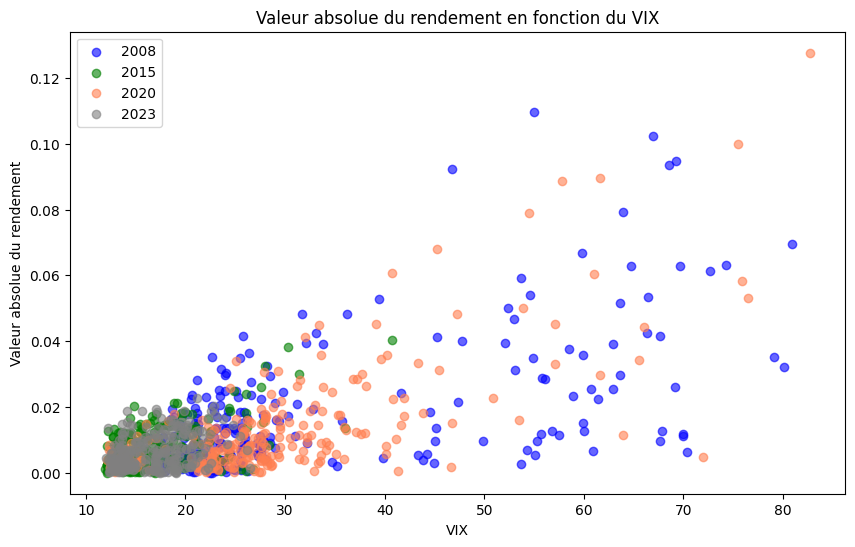

In [ ]:
plt.figure(figsize=(10, 6))

plt.scatter(data_2008['VIX'], abs(data_2008['Return']), label='2008', alpha=0.6,color='blue')
plt.scatter(data_2015['VIX'], abs(data_2015['Return']), label='2015', alpha=0.6,color='green')
plt.scatter(data_2020['VIX'], abs(data_2020['Return']), label='2020', alpha=0.6,color='coral')
plt.scatter(data_2023['VIX'], abs(data_2023['Return']), label='2023', alpha=0.6,color='grey')



plt.title('Valeur absolue du rendement en fonction du VIX')
plt.xlabel('VIX')
plt.ylabel('Valeur absolue du rendement')

plt.legend()

plt.show()

In [ ]:
all_data = pd.concat([data_2008, data_2015, data_2020, data_2023]).sort_values(by='VIX')

X = all_data[['VIX']]
y = all_data['Return']

model = LinearRegression()

model.fit(X, y)

beta0 = model.intercept_
beta1 = model.coef_[0]

print("Coefficient beta0 (intercept) :", beta0)
print("Coefficient beta1 (pente) :", beta1)


Coefficient beta0 (intercept) : 0.005012773946418557
Coefficient beta1 (pente) : -0.00021491833610888693


R^2 =  0.4574163860113857
ꞵ0, ꞵ1, ꞵ2 =  [0.00000000e+00 3.09556714e-04 3.14121344e-04 5.80595234e-06]
-0.0005216031004126129


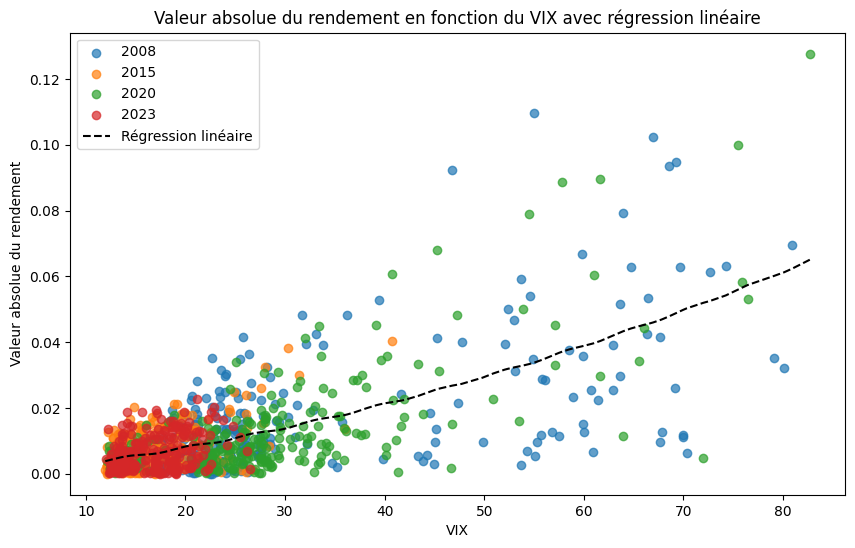

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_2008['VIX'], abs(data_2008['Return']), label='2008', alpha=0.7)
plt.scatter(data_2015['VIX'], abs(data_2015['Return']), label='2015', alpha=0.7)
plt.scatter(data_2020['VIX'], abs(data_2020['Return']), label='2020', alpha=0.7)
plt.scatter(data_2023['VIX'], abs(data_2023['Return']), label='2023', alpha=0.7)

x_vect = all_data["VIX"]
y_vect = abs(all_data["Return"])
n = len(x_vect)
scores = []
scores_ajustes = []
p = 3
x_mod_tab = np.ones((n, p+1))
x_mod_tab[:, 1] = x_vect
x_mod_tab[:, 2] = np.sin(x_vect)
x_mod_tab[:, 3] = x_vect**2


reg_mod = LinearRegression().fit(x_mod_tab, y_vect)
score = reg_mod.score(x_mod_tab, y_vect)
scores += [score]
scores_ajustes += [1-(n-1) * (1-score) / (n-(p + 1))]
print("R^2 = ", score)
print("ꞵ0, ꞵ1, ꞵ2 = ", reg_mod.coef_)
print(reg_mod.intercept_)
y_hat = reg_mod.intercept_ * x_mod_tab[:, 0]
for k in range(1, p+1):
  y_hat += reg_mod.coef_[k] * x_mod_tab[:, k]
plt.plot(x_vect, y_hat, color='black', linestyle='--', label=f'Régression linéaire')

plt.title('Valeur absolue du rendement en fonction du VIX avec régression linéaire')
plt.xlabel('VIX')
plt.ylabel('Valeur absolue du rendement')

plt.legend()

plt.show()

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(data_2008['VIX'], data_2008['Return'], label='2008', alpha=0.7)
plt.scatter(data_2015['VIX'], data_2015['Return'], label='2015', alpha=0.7)
plt.scatter(data_2020['VIX'], data_2020['Return'], label='2020', alpha=0.7)
plt.scatter(data_2023['VIX'], data_2023['Return'], label='2023', alpha=0.7)

x_vect = all_data["VIX"]
y_vect = abs(all_data["Return"])
n = len(x_vect)
scores = []
scores_ajustes = []
p = 3

x_mod_tab = np.ones((n, p+1))
x_mod_tab[:, 1] = np.sin(x_vect)
x_mod_tab[:, 2] = np.log(x_vect)

reg_mod = LinearRegression().fit(x_mod_tab, y_vect)
score = reg_mod.score(x_mod_tab, y_vect)
scores += [score]
scores_ajustes += [1-(n-1) * (1-score) / (n-(p + 1))]
print("R^2 = ", score)
print("Coefficients: ", reg_mod.coef_)
print("Intercept: ", reg_mod.intercept_)
y_hat = reg_mod.intercept_ * x_mod_tab[:, 0]
for k in range(1, p+1):
  y_hat += reg_mod.coef_[k] * x_mod_tab[:, k]

plt.plot(x_vect, y_hat, color='black', linestyle='--', label='Meilleur modèle linéaire')
plt.title('Valeur réelle du rendement en fonction du VIX avec régression linéaire')
plt.xlabel('VIX')
plt.ylabel('Valeur réelle du rendement')
plt.legend()

plt.show()

In [ ]:
X = all_data["VIX"]
y = all_data["Return"]


X_with_intercept = np.column_stack([np.ones(X.shape[0]), X])

X_with_intercept = X_with_intercept.astype(float)
y = y.astype(float)

coefficients = np.linalg.inv(X_with_intercept.T @ X_with_intercept) @ X_with_intercept.T @ y

Beta0, Beta1= coefficients[0], coefficients[1]
print("Beta0:", Beta0)
print("Beta1:", Beta1)
y_pred = Beta0 + Beta1*X
plt.plot(X, y_pred, color='black', linestyle='--', label='Meilleur modèle linéaire')
plt.plot(x_vect, y_vect)
plt.title('Rendement en fonction du VIX')
plt.show()
display(all_data)

In [ ]:
#Univarité quantitatif (VIX)

#moyenne, mediane, graph repartition volume

sp = yf.download("^GSPC", start=startdate, end=enddate)
sp['Return'] = np.log(sp['Close'] / sp['Close'].shift(1))
sp = sp.reset_index()
print("")
moyenne = sp['Return'].mean()

print("Depuis 2023, la moyenne du VIX était : ", moyenne)

mediane_2008= sp['Return'].median();

print("Depuis 2023, la médiane du VIX était : ", mediane_2008)

minvix=sp['Return'].min()
maxvix=sp['Return'].max()

print("Minimum : ",minvix," Maximum : ",maxvix);


ecarttype_vix = sp['Return'].std()

variance_vix = sp['Return'].var()




print("La variance du VIX était de :", variance_vix, " et l'écart-type : ", ecarttype_vix)


[*********************100%%**********************]  1 of 1 completed


Depuis 2023, la moyenne du VIX était :  0.0008793731712155409
Depuis 2023, la médiane du VIX était :  0.0007506937530339595
Minimum :  -0.020244783973471698  Maximum :  0.02258383558903089
La variance du VIX était de : 6.406849320917879e-05  et l'écart-type :  0.008004279680844417


Problématique n3

industry
Aerospace & Defense                 82219.166667
Asset Management                    20162.600000
Banks - Regional                    29559.700000
Diagnostics & Research              40174.166667
Information Technology Services    148291.545455
Name: fullTimeEmployees, dtype: float64


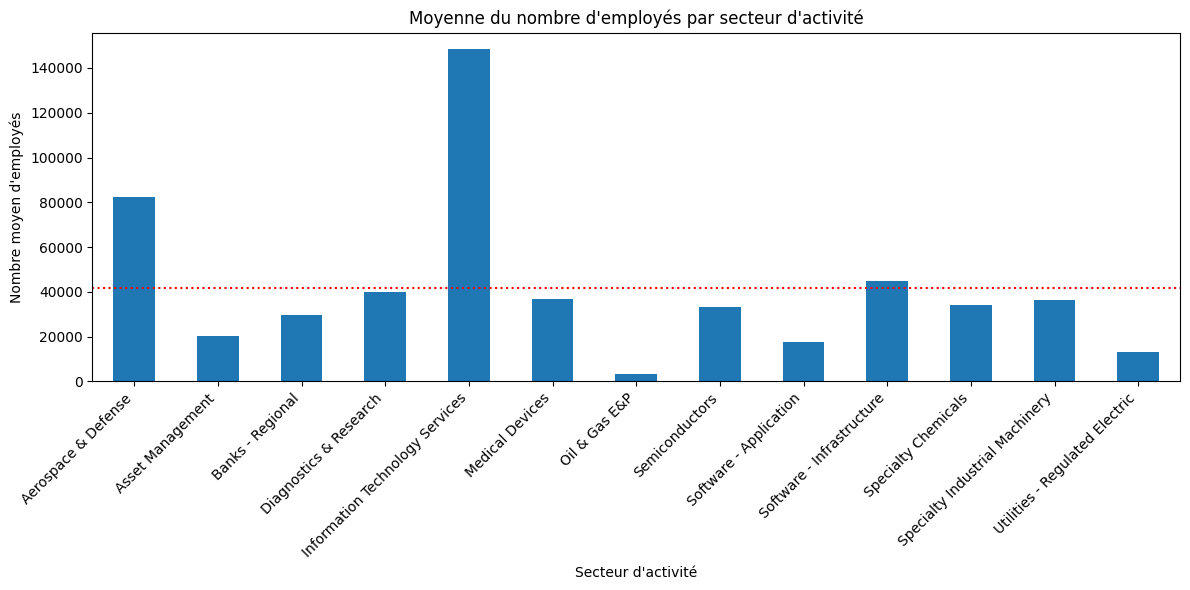

In [ ]:
sp500_df_sorted = sp500_df.sort_values(by='industry')
moyenne_employes_par_secteur = sp500_df.groupby('industry')['fullTimeEmployees'].mean()

moyenne_employes_par_secteur_filtre = moyenne_employes_par_secteur[~moyenne_employes_par_secteur.index.isin(other_secteurs)] # on enleve les entreprises qui appartiennent à la catégorie autre
print(moyenne_employes_par_secteur_filtre.head())
moyenne_employes_par_secteur_filtre_moyenne=moyenne_employes_par_secteur_filtre.mean()

plt.figure(figsize=(12, 6))
moyenne_employes_par_secteur_filtre.plot(kind='bar')
plt.title('Moyenne du nombre d\'employés par secteur d\'activité')
plt.xlabel('Secteur d\'activité')
plt.ylabel('Nombre moyen d\'employés')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.axhline(y=moyenne_employes_par_secteur_filtre_moyenne, color='r', linestyle='dotted', label="Moyenne du personnel")
plt.show()

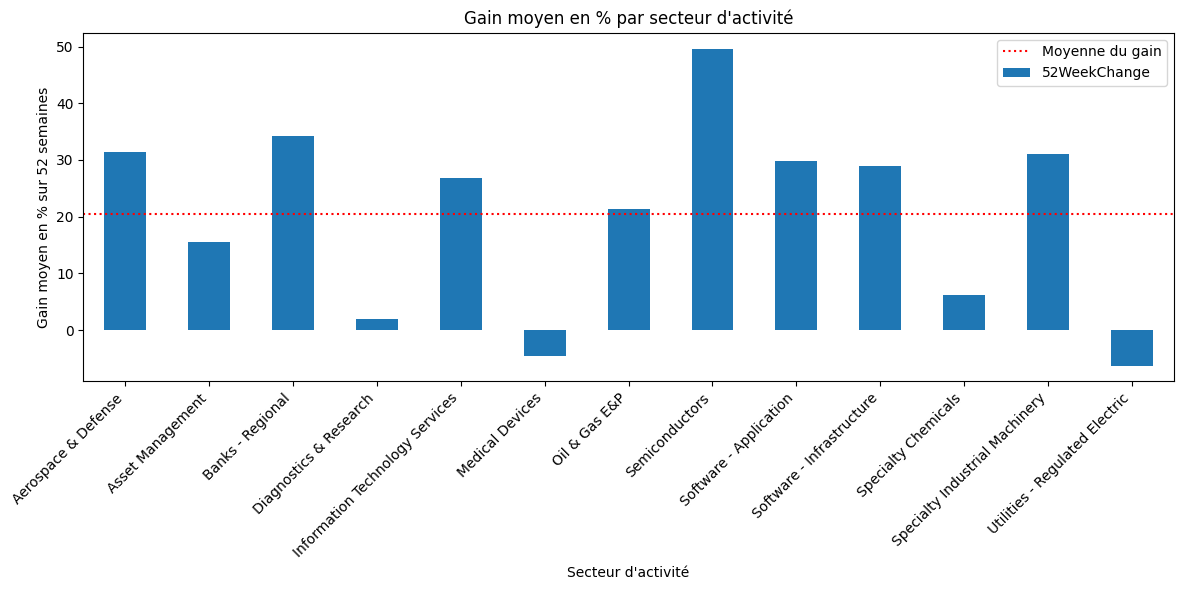

    symbol  52WeekChange state
326   MPWR      0.451947    WA
389   QRVO      0.271861    NC
35     ADI      0.110204    MA
253   INTC      0.053409    CA
391   QCOM      0.457239    CA
445    TXN      0.093632    TX
6      AMD      0.781782    CA
418   SWKS      0.023340    CA
318     MU      0.847496    ID
317   MCHP      0.224120    AZ
75    AVGO      1.186073    CA
356     ON     -0.105469    AZ
349   NVDA      2.110847    CA
351   NXPI      0.440907   NaN
2673.8258336363638
1677.4138029414587


In [ ]:
#print(sp500_df.head())
sp500_df_sorted = sp500_df.sort_values(by='industry')
evolution_prix_moyen = sp500_df.groupby('industry')['52WeekChange'].mean()

evolution_prix_moyen_sans_autre = evolution_prix_moyen[~evolution_prix_moyen.index.isin(other_secteurs)] # on enleve les entreprises qui appartiennent à la catégorie autre
evolution_prix_moyen_sans_autre=evolution_prix_moyen_sans_autre.mul(100) # mettre en %

plt.figure(figsize=(12, 6))
evolution_prix_moyen_sans_autre.plot(kind='bar')
plt.title("Gain moyen en % par secteur d'activité")
plt.xlabel("Secteur d'activité")
plt.ylabel("Gain moyen en % sur 52 semaines")
plt.xticks(rotation=45, ha='right')
moyenne_evolutoin_gain52w = evolution_prix_moyen_sans_autre.mean()
plt.axhline(y=moyenne_evolutoin_gain52w, color='r', linestyle='dotted', label="Moyenne du gain")

plt.legend()
plt.tight_layout()
plt.show()



semi = sp500_df_sorted.loc[sp500_df_sorted['industry'] == 'Semiconductors']
print(semi[['symbol', '52WeekChange', 'state']])


print(evolution_prix_moyen_sans_autre.median()*100)
print(evolution_prix_moyen_sans_autre.std()*100)




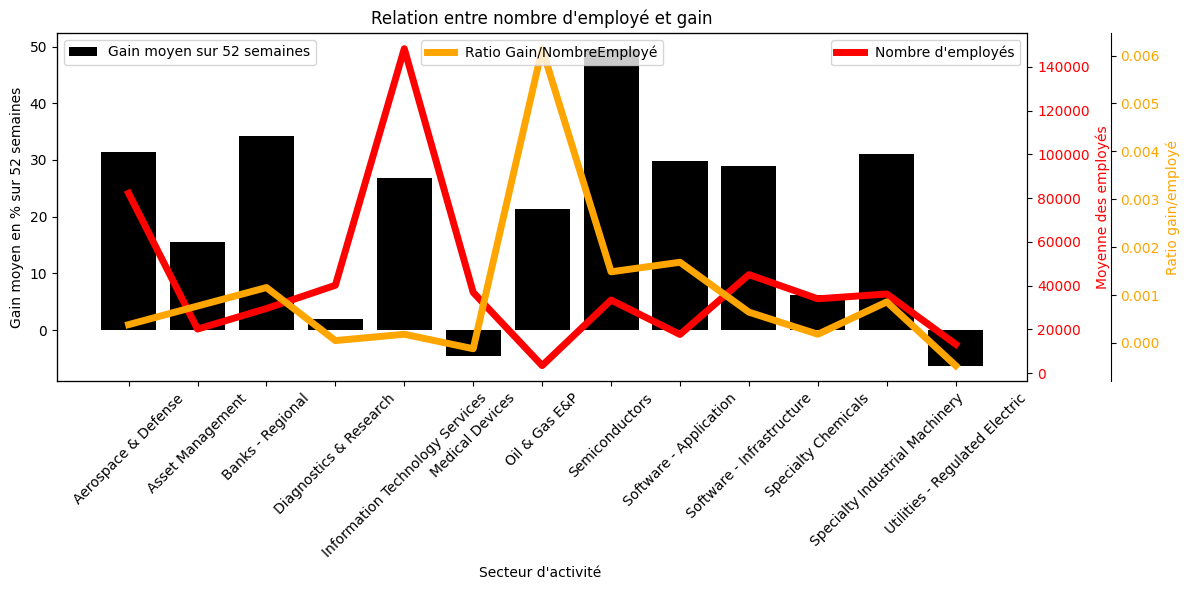

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.bar(evolution_prix_moyen_sans_autre.index, evolution_prix_moyen_sans_autre.values, color='black')
ax1.set_xlabel("Secteur d'activité ")
ax1.set_ylabel("Gain moyen en % sur 52 semaines")
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.plot(moyenne_employes_par_secteur_filtre.index, moyenne_employes_par_secteur_filtre.values, color='red',linewidth=5)
ax2.set_ylabel("Moyenne des employés", color='red')
ax2.tick_params(axis='y', labelcolor='red')

ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(ratio_employe_gain.index, ratio_employe_gain.values, color='orange',linewidth=5)
ax3.set_ylabel('Ratio gain/employé', color='orange')
ax3.tick_params(axis='y', labelcolor='orange')

ax1.tick_params(axis='x', rotation=45)
ax2.tick_params(axis='x', rotation=45)
ax3.tick_params(axis='x', rotation=45)

ax1.legend(["Gain moyen sur 52 semaines"], loc="upper left")
ax2.legend(["Nombre d'employés"], loc="upper right")
ax3.legend(["Ratio Gain/NombreEmployé"], loc="upper center")

plt.title("Relation entre nombre d'employé et gain")

plt.tight_layout()
plt.show()

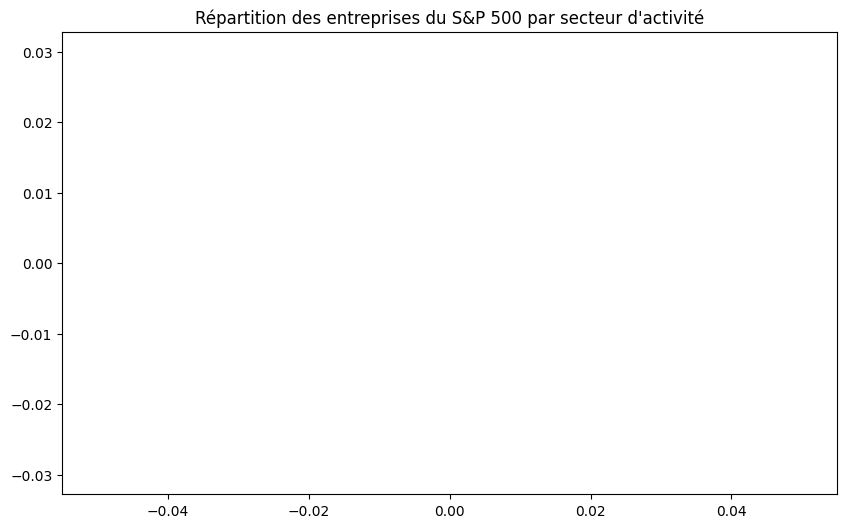

In [ ]:
sp500_df_etat= sp500_df.sort_values(by='state')
plt.figure(figsize=(10, 6))
plt.title("Répartition des entreprises du S&P 500 par secteur d'activité")
plt.ylabel(None)
plt.show()